c:\Users\sheshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sheshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'chol')

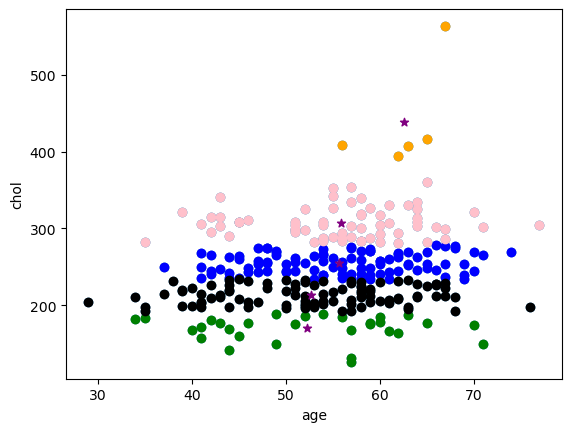

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn import  preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

#loading the data
hd = pd.read_csv('heart-disease-dataset.csv')

#removing the '?' characters
hd = hd.replace({'?': np.nan})
hd.dropna(inplace=True)

hd.head()

#scatter plot of age vs cholesterol - what the k value should be is not clear in this case
plt.scatter(hd.age, hd.chol)

km = KMeans(n_clusters = 5)

y_predicted = km.fit_predict(hd[['age', 'chol']])
#y_predicted

#plotting another scatter plot to see the clustering
hd['cluster'] = y_predicted
# hd.head()


#seperating the data frames
df1 = hd[hd.cluster==0]
df2 = hd[hd.cluster==1]
df3 = hd[hd.cluster==2]
df4 = hd[hd.cluster==3]
df5 = hd[hd.cluster==4]
plt.scatter(df1.age, df1.chol, color = 'blue')
plt.scatter(df2.age, df2.chol, color= 'pink')
plt.scatter(df3.age, df3.chol, color = 'green')
plt.scatter(df4.age, df4.chol, color = 'orange')
plt.scatter(df5.age, df5.chol, color = 'black')

#adding centroid markers
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')
plt.xlabel('age')
plt.ylabel('chol')

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


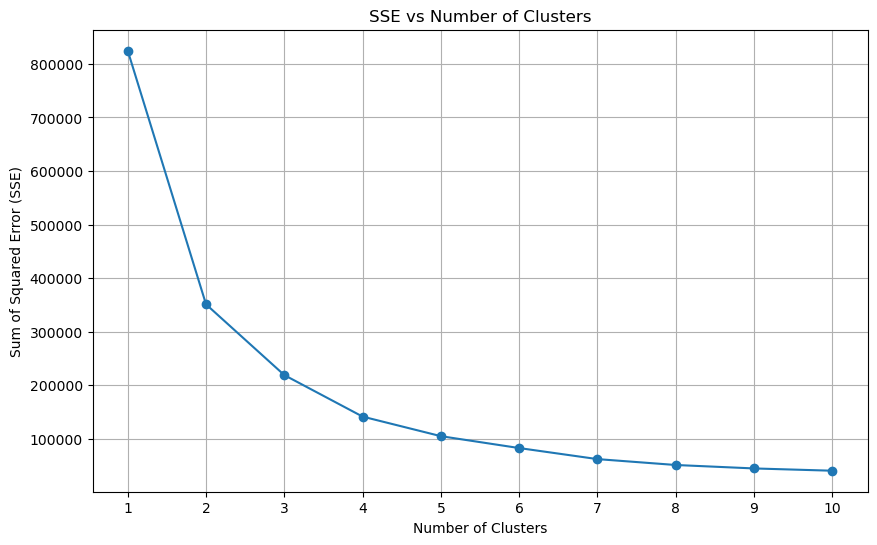

Based on the plot we can see that k=3 because the elbow is at k=3


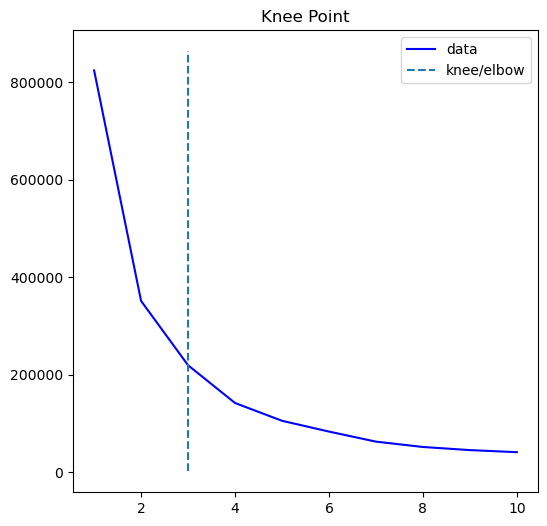

In [15]:
!pip install kneed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

#loading the data
data = pd.read_csv('heart-disease-dataset.csv')

#removing the '?' characters
data = data.replace({'?': np.nan})
data.dropna(inplace=True)

newData = data[['age','chol']]

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(newData)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('SSE vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error (SSE)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
optimal_k = kl.elbow
kl.plot_knee()

print("Based on the plot we can see that k=3 because the elbow is at k=3")


219073.86275801493


/Users/kushpanjwani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


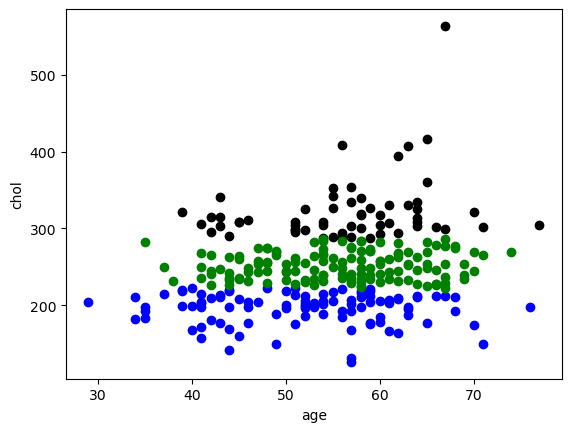

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('heart-disease-dataset.csv')

#removing the '?' characters
data = data.replace({'?': np.nan})
data.dropna(inplace=True)
km = KMeans(n_clusters=3)
y_predictedValue = km.fit_predict(data[['age', 'chol']])
data['cluster']=y_predictedValue
x1 = data[data.cluster==0]
x2 = data[data.cluster==1]
x3 = data[data.cluster==2]
plt.scatter(x1.age, x1.chol, color = 'black')
plt.scatter(x2.age, x2.chol, color = 'blue')
plt.scatter(x3.age, x3.chol, color = 'green')
plt.xlabel('age')
plt.ylabel('chol')
sse3 = km.inertia_
print(sse3)


C:\Users\shaan\AppData\Local\Temp\ipykernel_464\529563610.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


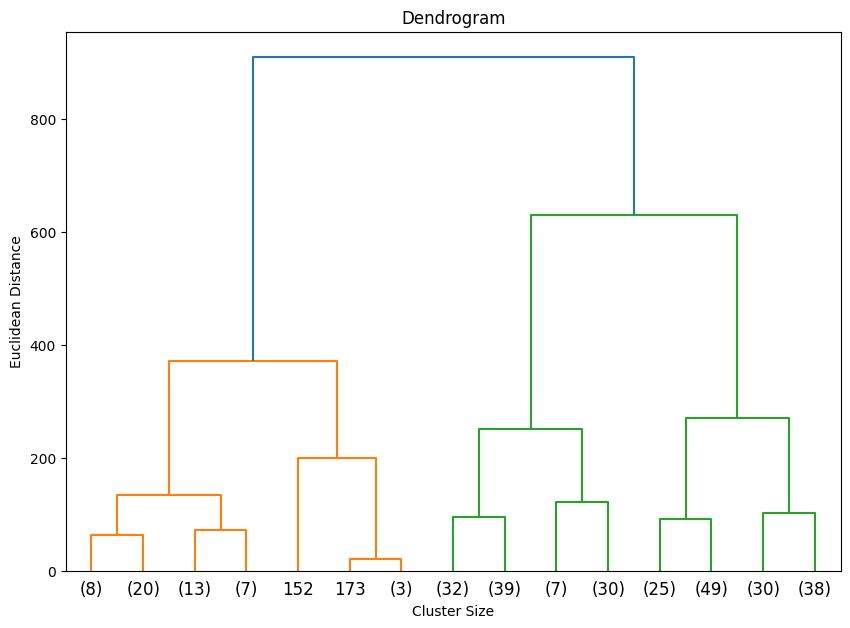

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv('heart-disease-dataset.csv')

X = data[['age', 'chol']].values

# Create the linkage matrix
Z = sch.linkage(X, method='ward')

# Configure the size of your plot
plt.figure(figsize=(10, 7))

# Generate and plot the dendrogram showing only 3 levels
dendrogram = sch.dendrogram(Z, truncate_mode='level', p=3)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Euclidean Distance')

# Display the plot
plt.show()

Agglomerative Clustering Plot


/Users/kushpanjwani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


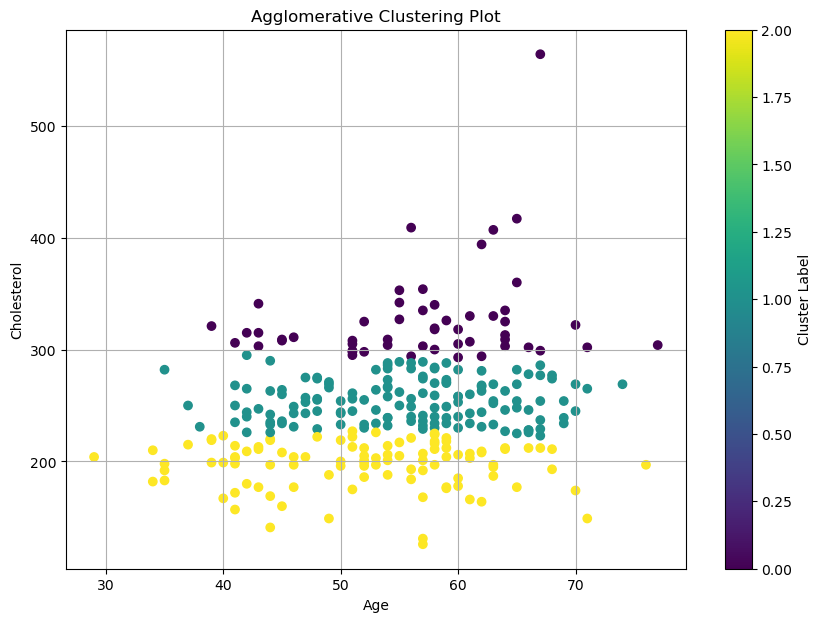

In [23]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(newData)
plt.figure(figsize=(10, 7))
plt.scatter(newData['age'], newData['chol'], c=cluster.labels_, cmap='viridis')
plt.title("Agglomerative Clustering Plot")
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.colorbar(label='Cluster Label')
plt.grid(True)
print("Agglomerative Clustering Plot")


In [32]:

scaler = StandardScaler()
newData_scaled = scaler.fit_transform(newData)


km = KMeans(n_clusters=3, random_state=42)
km.fit(newData_scaled)
km_labels = km.labels_


agglomerative = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agglomerative_labels = agglomerative.fit_predict(newData_scaled)


KMscore = silhouette_score(newData_scaled, km_labels, metric='euclidean')
agScore = silhouette_score(newData_scaled, agglomerative_labels, metric='euclidean')

print(f"The K-mean silhouette score is: {KMscore:.5f}")
print(f"The Agglomerative Clustering silhouette score is: {agScore:.5f}")
print("Based on the silhouette scores, K-means clustering is better for this given dataset")

The K-mean silhouette score is: 0.36173
The Agglomerative Clustering silhouette score is: 0.33888
Based on the silhouette scores, K-means clustering is better for this given dataset


/Users/kushpanjwani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kushpanjwani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
